In [1]:
import math
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt

pandas.options.display.max_columns = None
pandas.options.display.max_rows = None
pandas.options.display.max_colwidth = None
seaborn.set(rc={"figure.figsize":(7,7)})

drop = ["StartDate", "EndDate", "Status", "IPAddress", "Progress", "Duration (in seconds)", "RecordedDate", "ResponseId", "RecipientLastName", "RecipientFirstName", "RecipientEmail", "ExternalReference", "LocationLatitude", "LocationLongitude", "DistributionChannel", "Finished", "UserLanguage"]

# first LANEY survey after BUILD program (June 2022)
laney1 = pandas.read_csv("csv/laney_build_june.csv").drop(columns=drop) # removing unneeded columns listed above
laney1 = laney1.drop(0) # removing unneeded second row of import IDs
laney1 = laney1.drop(1) # removing unneeded first row of questions

# final LANEY survey after Laney semester (December 2022)
laney2 = pandas.read_csv("csv/laney_dec.csv").drop(columns=drop)

def get_responses(df, column):
    
    results = {
        "valid": 0,
        "di": 0,
        "sd": 0,
        "n": 0,
        "sa": 0,
        "ag": 0,
    }
    
    results_2 = {
        "valid": 0,
        "n": 0,
        "r": 0,
        "s": 0,
        "v": 0,
        "a": 0
    }
    
    results_3 = {
        "valid": 0,
        "n": 0,
        "s": 0,
        "f": 0,
        "v": 0
    }
    
    if "." in column:
        
        for index, row in df.iterrows():

            if isinstance(row[column], str): 
                results_2["valid"] += 1

            if row[column] == "Never":
                results_2["n"] += 1
            elif row[column] == "Rarely":
                results_2["r"] += 1
            elif row[column] == "Sometimes":
                results_2["s"] += 1
            elif row[column] == "Very often":
                results_2["v"] += 1
            elif row[column] == "Always":
                results_2["a"] += 1
                
        return results_2
    
    elif "Python" in column:
        
        for index, row in df.iterrows():

            if isinstance(row[column], str): 
                results_3["valid"] += 1

            if row[column] == "Not confident at all":
                results_3["n"] += 1
            elif row[column] == "Slightly confident":
                results_3["s"] += 1
            elif row[column] == "Fairly confident":
                results_3["f"] += 1
            elif row[column] == "Very confident":
                results_3["v"] += 1
    
        return results_3
    
    else:
        
        for index, row in df.iterrows():

            if isinstance(row[column], str): 
                results["valid"] += 1

            if row[column] == "Strongly disagree":
                results["di"] += 1
            elif row[column] == "Somewhat disagree":
                results["sd"] += 1
            elif row[column] == "Unsure or undecided":
                results["n"] += 1
            elif row[column] == "Somewhat agree":
                results["sa"] += 1
            elif row[column] == "Strongly agree":
                results["ag"] += 1
            elif row[column] == "Unsure or undecided":
                results["u"] += 1
            
        return results

def multi_response(df, columns):
    
    results = {}
    
    for col in columns:
        results[col] = get_responses(df, col)
        
    return results

def total_multi(obj):
    
    results = {
        "valid": 0,
        "pos": 0,
        "pos_with_n": 0
    }

    for key in obj:

        results["valid"] += obj[key]["valid"]

        if "di" in list(obj[key].keys()):

            results["pos"] += obj[key]["sa"] + obj[key]["ag"]
            results["pos_with_n"] += obj[key]["n"]

        elif "r" in list(obj[key].keys()):

            results["pos"] += obj[key]["s"] + obj[key]["v"] + obj[key]["a"]

        else:

            results["pos"] += obj[key]["s"] + obj[key]["f"] + obj[key]["v"]

    results["pos_with_n"] += results["pos"]

    return results

To start I am calculating the total number of Laney BUILD program graduates. In relation to the number of program graduates, we will also address learner demographics and program retention rates. Admissions information is being based off of the information found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1OOvmEnWL1l4DWj17oB7GQihKSmP0jb0Pnz_hABw5ezg/edit?usp=sharing) and demographic information comes from [this spreadsheet](https://docs.google.com/spreadsheets/d/1atztYmxm239wJqQiIN7XOCVAo1YHFHBCpSZjLXRVLWc/edit?usp=sharing).

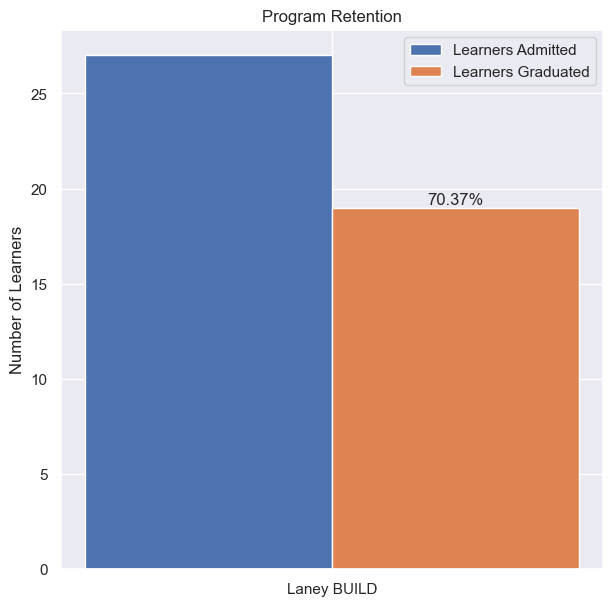

In [2]:
admit = 27
fin = 19
retention = fin / admit

# creating visual for retention data
X = ['Laney BUILD']
admit = [admit]
complete = [fin]
  
X_axis = np.arange(len(X))
  
fig = plt.bar(X_axis - 0.2, admit, 0.4, label = 'Learners Admitted')
fig = plt.bar(X_axis + 0.2, fin, 0.4, label = 'Learners Graduated')
  
plt.xticks(X_axis, X)
plt.ylabel("Number of Learners")
plt.title("Program Retention")
plt.bar_label(fig, ["{}%".format(round(retention*100, 2))])
plt.legend()
# plt.savefig('images/laneyb_retention.png')
plt.show()

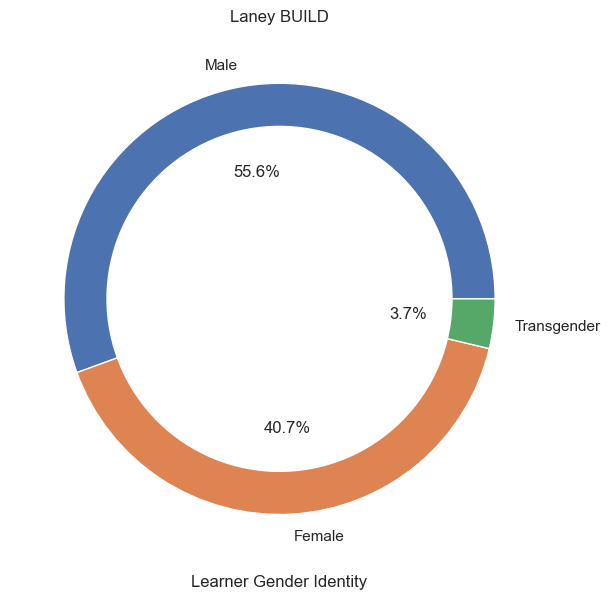

In [3]:
male = 15
female = 11
transgender = 1

# create data

labels = ["Male", "Female", "Transgender"]

total = male + female + transgender

per = (male/total) * 100
per2 = (female/total) * 100
per3 = 100 - per - per2
                                                                     
size_of_groups = [per, per2, per3]

# Create a pieplot
plt.pie(size_of_groups, labels = labels, autopct='%1.1f%%', shadow=False)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("Learner Gender Identity")
plt.title("Laney BUILD")
# plt.savefig('images/laneyb_gender_donut.png')
plt.show()

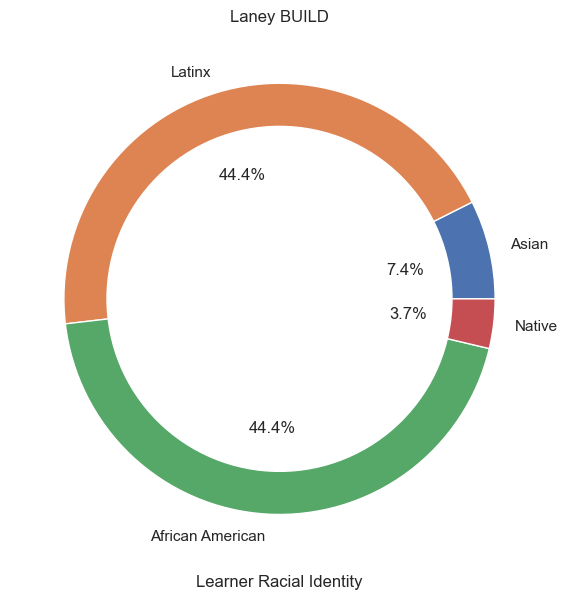

In [4]:
asian = 2
afro = 12
latinx = 12
native = 1

# create data

labels = ["Asian", "Latinx", "African American", "Native"]

total = asian + afro + latinx + native

per = (asian/total) * 100
per2 = (latinx/total) * 100
per3 = (afro/total) * 100
per4 = 100 - per - per2 - per3
                                                                     
size_of_groups = [per, per2, per3, per4]

# Create a pieplot
plt.pie(size_of_groups, labels = labels, autopct='%1.1f%%', shadow=False)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("Learner Racial Identity")
plt.title("Laney BUILD")
# plt.savefig('images/laneyb_race_donut.png')
plt.show()

<hr style="border:2px solid black">

<b>First we will be examining all the learners responses to get a sense of our program's overall impact in various areas.</b> Learners responded to questions which assessed their technical skills, based on their ability to communicate about technology and perform general programming task. Our questions then assessed their values towards using tech for good, their sense of community within the program, and knowledge gained about career opportunities in tech. Finally, we inquire about their intersectional tech identity, how much they feel like they belong in tech and can be successful in the field.

<b>It is important to note that the number of survey responses differs from the number of verified program graduates. Among those responses, not every survey participant answered every question.</b>

In this evaluation, <b>"positive responses"</b> is referring to the response choices of <b>"Sometimes", "Very often", "Always", "Slightly confident", "Fairly confident", "Very confident", "Somewhat agree",</b> and <b>"Strongly agree".</b>

In [5]:
# combine Communication, Programming & Python

laney = multi_response(laney1, ["QID1_1", "QID1_2", "Programming Skills_1", "Programming Skills_2", "Programming Skills_3", "Programming Skills_1.1", "Programming Skills_2.1", "Programming Skills_3.1"])

laney_totals = total_multi(laney)

laney, laney_totals

({'QID1_1': {'valid': 11, 'di': 0, 'sd': 0, 'n': 0, 'sa': 6, 'ag': 5},
  'QID1_2': {'valid': 11, 'di': 0, 'sd': 1, 'n': 2, 'sa': 3, 'ag': 5},
  'Programming Skills_1': {'valid': 11,
   'di': 0,
   'sd': 0,
   'n': 4,
   'sa': 5,
   'ag': 2},
  'Programming Skills_2': {'valid': 11,
   'di': 0,
   'sd': 0,
   'n': 1,
   'sa': 3,
   'ag': 7},
  'Programming Skills_3': {'valid': 11,
   'di': 0,
   'sd': 0,
   'n': 2,
   'sa': 7,
   'ag': 2},
  'Programming Skills_1.1': {'valid': 11,
   'n': 0,
   'r': 1,
   's': 4,
   'v': 4,
   'a': 2},
  'Programming Skills_2.1': {'valid': 11,
   'n': 0,
   'r': 2,
   's': 6,
   'v': 3,
   'a': 0},
  'Programming Skills_3.1': {'valid': 11,
   'n': 0,
   'r': 1,
   's': 5,
   'v': 3,
   'a': 2}},
 {'valid': 88, 'pos': 74, 'pos_with_n': 83})

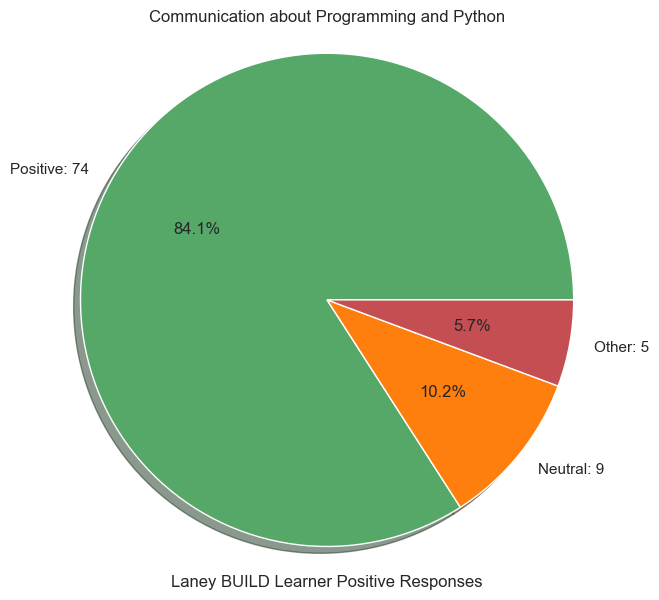

In [6]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = 100 - per - per2

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["g", "tab:orange", "r"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney BUILD Learner Positive Responses")
plt.title("Communication about Programming and Python")
# plt.savefig('images/laneyb_comm_about_tech_pie.png')
plt.show()

<b>Overall, there were 88 learner responses to the Communication about Programming and Python section of the survey. 74 (84.1%) were positive not including neutral responses. 83 (94.3%) were positive including neutral responses.</b>

In [7]:
# combine, HtH values, Social justice and community, HtH community & belongingness, Goals, Career

laney = multi_response(laney1, ["Values_1", "Values_2", "Values_3", "SJ & Community_1", "Community_1", "Community_2", "Community_3", "Community_4", "Goals_1", "Career Opportunities_1", "Career Opportunities_2"])

laney_totals = total_multi(laney)

laney, laney_totals

({'Values_1': {'valid': 9, 'di': 0, 'sd': 0, 'n': 0, 'sa': 5, 'ag': 4},
  'Values_2': {'valid': 9, 'di': 0, 'sd': 0, 'n': 1, 'sa': 3, 'ag': 5},
  'Values_3': {'valid': 9, 'di': 0, 'sd': 0, 'n': 0, 'sa': 3, 'ag': 6},
  'SJ & Community_1': {'valid': 9, 'di': 0, 'sd': 0, 'n': 0, 'sa': 3, 'ag': 6},
  'Community_1': {'valid': 9, 'di': 0, 'sd': 0, 'n': 0, 'sa': 5, 'ag': 4},
  'Community_2': {'valid': 9, 'di': 0, 'sd': 0, 'n': 0, 'sa': 2, 'ag': 7},
  'Community_3': {'valid': 9, 'di': 0, 'sd': 0, 'n': 0, 'sa': 2, 'ag': 7},
  'Community_4': {'valid': 9, 'di': 0, 'sd': 1, 'n': 1, 'sa': 2, 'ag': 5},
  'Goals_1': {'valid': 9, 'di': 0, 'sd': 1, 'n': 0, 'sa': 4, 'ag': 4},
  'Career Opportunities_1': {'valid': 9,
   'di': 0,
   'sd': 0,
   'n': 1,
   'sa': 5,
   'ag': 3},
  'Career Opportunities_2': {'valid': 9,
   'di': 0,
   'sd': 0,
   'n': 1,
   'sa': 5,
   'ag': 3}},
 {'valid': 99, 'pos': 93, 'pos_with_n': 97})

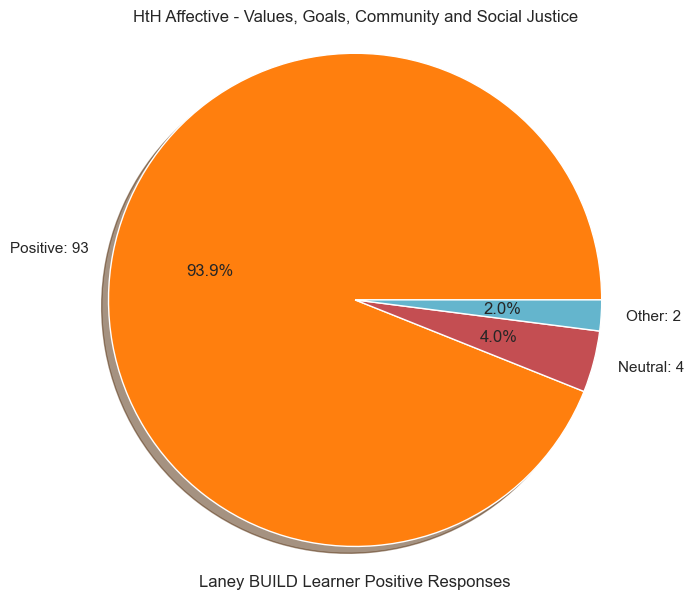

In [8]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = 100 - per - per2

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["tab:orange", "r", "c"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney BUILD Learner Positive Responses")
plt.title("HtH Affective - Values, Goals, Community and Social Justice")
# plt.savefig('images/laneyb_affective_pie.png')
plt.show()

<b>Overall, there were 99 learner responses to the HtH Affective section of the survey. 93 (93.9%) were positive not including neutral responses. 97 (98%) were positive including neutral responses.</b>

In [9]:
# intersectional tech identity

laney = multi_response(laney1, ["Gee_1", "Gee_2", "Gee_3", "McAlpine_1", "McAlpine_2", "McAlpine_3", "McAlpine_4", "McAlpine_5"])

laney_totals = total_multi(laney)

laney, laney_totals

({'Gee_1': {'valid': 9, 'di': 0, 'sd': 0, 'n': 1, 'sa': 2, 'ag': 6},
  'Gee_2': {'valid': 9, 'di': 0, 'sd': 0, 'n': 0, 'sa': 3, 'ag': 6},
  'Gee_3': {'valid': 9, 'di': 0, 'sd': 0, 'n': 1, 'sa': 5, 'ag': 3},
  'McAlpine_1': {'valid': 9, 'di': 0, 'sd': 0, 'n': 1, 'sa': 3, 'ag': 5},
  'McAlpine_2': {'valid': 9, 'di': 0, 'sd': 1, 'n': 1, 'sa': 3, 'ag': 4},
  'McAlpine_3': {'valid': 9, 'di': 0, 'sd': 0, 'n': 0, 'sa': 4, 'ag': 5},
  'McAlpine_4': {'valid': 9, 'di': 0, 'sd': 0, 'n': 0, 'sa': 5, 'ag': 4},
  'McAlpine_5': {'valid': 9, 'di': 0, 'sd': 0, 'n': 0, 'sa': 3, 'ag': 6}},
 {'valid': 72, 'pos': 67, 'pos_with_n': 71})

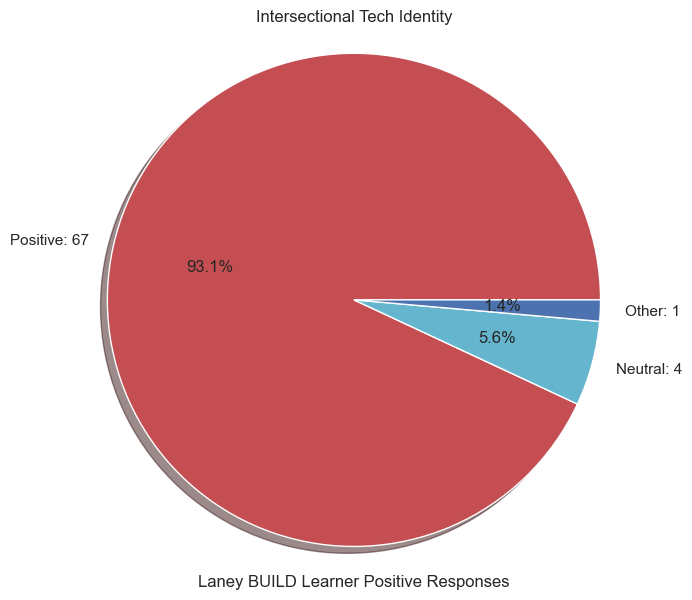

In [10]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = 100 - per - per2

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["r", "c", "b"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney BUILD Learner Positive Responses")
plt.title("Intersectional Tech Identity")
# plt.savefig('images/laneyb_identity_pie.png')
plt.show()

<b>Overall, there were 72 learner responses to the Intersectional Tech Identity section of the survey. 67 (93.1%) were positive not including neutral responses. 71 (98.6%) were positive including neutral responses.</b>

<hr style="border:2px solid black">
    
<b>Next we will be examining the learners responses to our inquiries about their ability to communicate about technology.</b> These questions are marked as the <b>QID1_1</b> and the <b>QID1_2</b> columns within the dataframe. Learners had five choices to choose from as their response to these questions: <b>Strongly Disagree, Somewhat Disagree, Somewhat Disagree, Strongly Agree</b>, and <b>Unsure or undecided.</b> 

<img src="images/laneyb_comm_just_tech.png" height=100% width=100%>

In [11]:
laney = multi_response(laney1, ["QID1_1", "QID1_2"])

laney_totals = total_multi(laney)

laney, laney_totals

({'QID1_1': {'valid': 11, 'di': 0, 'sd': 0, 'n': 0, 'sa': 6, 'ag': 5},
  'QID1_2': {'valid': 11, 'di': 0, 'sd': 1, 'n': 2, 'sa': 3, 'ag': 5}},
 {'valid': 22, 'pos': 19, 'pos_with_n': 21})

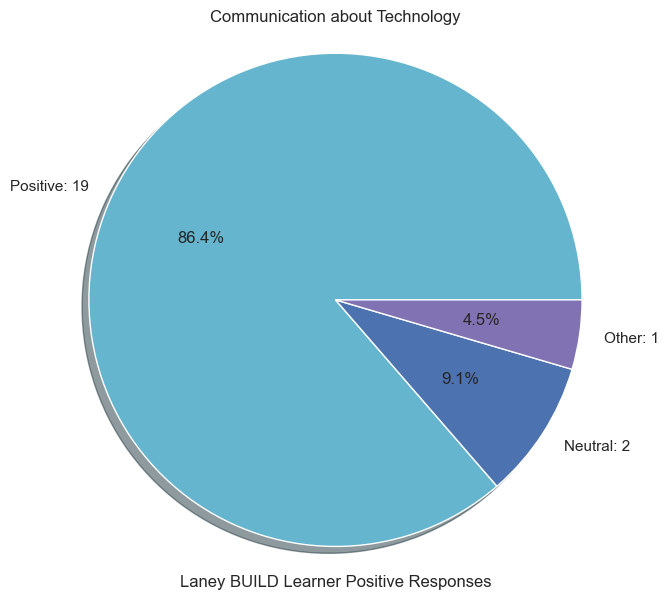

In [12]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = 100 - per - per2

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["c", "b", "m"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney BUILD Learner Positive Responses")
plt.title("Communication about Technology")
# plt.savefig('images/laneyb_comm_just_tech_pie.png')
plt.show()

<b>Overall, there were 22 responses given from all learners. Of those responses, 21 (95.5%) were positive including neutral responses and 19 (86.4%) were positive not including neutral responses.</b>

# I can communicate verbally or in writing to others about technology or programming.

In [13]:
get_responses(laney1, "QID1_1")

{'valid': 11, 'di': 0, 'sd': 0, 'n': 0, 'sa': 6, 'ag': 5}

<img src="images/laneyb_qid1_table.png" height=100% width=100%>

# I can give a short talk to an audience about technology or programming.

In [14]:
get_responses(laney1, "QID1_2")

{'valid': 11, 'di': 0, 'sd': 1, 'n': 2, 'sa': 3, 'ag': 5}

<img src="images/laneyb_qid2_table.png" height=100% width=100%>

<hr style="border:2px solid black">
    
<b>Next we will be examining the learners responses to our inquiries about their general programming and computer science skills.</b> These questions are marked as the <b>Programming Skills_1, Programming Skills_2, Programming Skills_3, Programming Skills_1.1, Programming Skills_2.1,</b> and the <b>Programming Skills_3.1</b> columns within the dataframe. Learners had five choices to choose from as their response to these questions. For the first three, those choices were <b>Strongly Disagree, Somewhat Disagree, Somewhat Disagree, Strongly Agree</b>, and <b>Unsure or undecided.</b> For the last three, the choices were <b>Never, Rarely, Sometimes, Very often</b>, and <b>Alwayse.</b>

<img src="images/laneyb_gen_cs.png" height=100% width=100%>
<img src="images/laneyb_gen_cs2.png" height=100% width=100%>

In [15]:
laney = multi_response(laney1, ["Programming Skills_1", "Programming Skills_2", "Programming Skills_3", "Programming Skills_1.1", "Programming Skills_2.1", "Programming Skills_3.1"])

laney_totals = total_multi(laney)

laney, laney_totals

({'Programming Skills_1': {'valid': 11,
   'di': 0,
   'sd': 0,
   'n': 4,
   'sa': 5,
   'ag': 2},
  'Programming Skills_2': {'valid': 11,
   'di': 0,
   'sd': 0,
   'n': 1,
   'sa': 3,
   'ag': 7},
  'Programming Skills_3': {'valid': 11,
   'di': 0,
   'sd': 0,
   'n': 2,
   'sa': 7,
   'ag': 2},
  'Programming Skills_1.1': {'valid': 11,
   'n': 0,
   'r': 1,
   's': 4,
   'v': 4,
   'a': 2},
  'Programming Skills_2.1': {'valid': 11,
   'n': 0,
   'r': 2,
   's': 6,
   'v': 3,
   'a': 0},
  'Programming Skills_3.1': {'valid': 11,
   'n': 0,
   'r': 1,
   's': 5,
   'v': 3,
   'a': 2}},
 {'valid': 66, 'pos': 55, 'pos_with_n': 62})

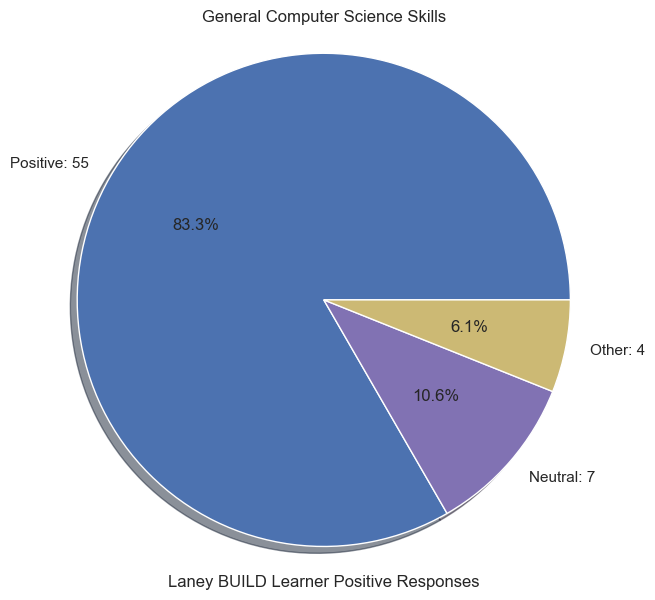

In [16]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = 100 - per - per2

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["b", "m", "y"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney BUILD Learner Positive Responses")
plt.title("General Computer Science Skills")
# plt.savefig('images/laneyb_gen_cs_pie.png')
plt.show()

<b>Overall, there were 66 responses given from all learners. Of those responses, 62 (93.9%) were positive including neutral responses and 55 (83.3%) were positive not including neutral responses.</b>

# I can write code to complete a simple task

In [17]:
get_responses(laney1, "Programming Skills_1")

{'valid': 11, 'di': 0, 'sd': 0, 'n': 4, 'sa': 5, 'ag': 2}

<img src="images/laneyb_program1_table.png" height=100% width=100%>

# I increased my programming skills in this program.

In [18]:
get_responses(laney1, "Programming Skills_2")

{'valid': 11, 'di': 0, 'sd': 0, 'n': 1, 'sa': 3, 'ag': 7}

<img src="images/laneyb_program2_table.png" height=100% width=100%>

# I can explain or storyboard a software idea that I have.

In [19]:
get_responses(laney1, "Programming Skills_3")

{'valid': 11, 'di': 0, 'sd': 0, 'n': 2, 'sa': 7, 'ag': 2}

<img src="images/laneyb_program3_table.png" height=100% width=100%>

# When I have errors in my code, I know a few things to look for.

In [20]:
get_responses(laney1, "Programming Skills_1.1")

{'valid': 11, 'n': 0, 'r': 1, 's': 4, 'v': 4, 'a': 2}

<img src="images/laneyb_program4_table.png" height=100% width=100%>

# When I write new code, I leave myself enough comments and notes to know what I did.

In [ ]:
get_responses(laney1, "Programming Skills_1.1")

<img src="images/laneyb_program5_table.png" height=100% width=100%>

# When I write new code, I leave myself enough comments and notes to know what I did.

In [21]:
laney1

,Q26,Verify,QID1_1,QID1_2,Programming Skills_1,Programming Skills_2,Programming Skills_3,Programming Skills_1.1,Programming Skills_2.1,Programming Skills_3.1,Values_1,Values_2,Values_3,SJ & Community_1,SJ & Community,SJ & Community.1,Community_1,Community_2,Community_3,Community_4,Community,Goals,Goals_1,Career Opportunities_1,Career Opportunities_2,Edu opportunity,Gee_1,Gee_2,Gee_3,McAlpine_1,McAlpine_2,McAlpine_3,McAlpine_4,McAlpine_5,Crenshaw,Crenshaw.1,Crenshaw.2,Any last thoughts?_1,Any last thoughts?_2,Why recommend,Open,SC0
2,DL23,Yes,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Sometimes,Sometimes,Sometimes,Strongly agree,Unsure or undecided,Strongly agree,Strongly agree,Technology allows you to have clear influence over your community. It influence how we view the world and shape the ways we have used technology over time.,"A social-technical discussion would be college should be for free for students who are attending a four year university. The government should pay college students tuition to cover their fees and make it easier for students who have loans or student debt to pay. It would give college students better access to education without having to worry about their next pay date and allow them to continue learning. They should make General Education requirement like Math, Science, History, English. Art, etc. for free to help them complete their requirement in time for graduation without having to stress about paying for their classes. College should be free because education matters.",Strongly agree,Strongly agree,Strongly agree,Strongly agree,My personal mentor Cindy! She has an outgoing and bubbly personally making talking fun and easy. She gave me personal insights on management and more technical roles to explore and gave me more clarity of each roles that made perfect sense. I was surprised to hear she was a pre-med major and with no technical background and was given a recommendation from her best friend to pursue a job into tech.,The goals I set myself during this program was to attend all zoom meetings and compete all my assignments on time and plan possible questions to ask my mentor to help me understand my roles into tech in hopes of finding a career into tech.,Strongly agree,Strongly agree,Strongly agree,NaN,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,I am an Asian American women who is pursuing a degree in computer science.,I am a women in the stem field who is going to change the world around me with the help of technology in hopes to inspire others to pursue a career into tech.,I love to connect with others in a deeper level to create meaningful connections to understand the world around us and stories we face in our community to help those who are silence by society to share their stories and let them be heard by spreading their message using technology to fight and change the way we view the world in hopes of building a better and safer environment to live.,Strongly agree,Strongly agree,I learn a lot throughout this program by posting all my coding assignments into GitHub to help build my portfolio on projects and assignments I did in Hack the Hood that would be beneficial of finding jobs into tech that would showcase my knowledge of coding and build my resume.,I enjoy Hack The Hood! This program gave me inspiration to use technology to help solve problems in our community.,137
3,DL03,Yes,Somewhat agree,Somewhat disagree,Somewhat agree,Strongly agree,Unsure or undecided,Very often,Very often,Sometimes,Somewhat agree,Strongly agree,Somewhat agree,Somewhat agree,I think technology can help my community in limitless ways. A random idea is making a general portal for all California CC's. This way the transfer process can be easier for uneasy students.,"Something I've always wanted to work on is a smart mirror. My friend brought up the idea of working on the code behind it and the touch screen